# Gromov Dynamic Time Warping for Non-Anthropomorphic Hand Data

In [69]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")


# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# From GDTW example code
import torch
from AligningTimeSeries.Code.GDTW import gromov_dtw 
import torch.nn as nn
from torch.utils.data import DataLoader
import pickle
from imageio import imread
import sklearn

In [70]:
# Create two sequences

#end_eff_raw = pd.read_csv(r'C:\Users\jmoln\AppData\LocalLow\DefaultCompany\NonAnthroHandsUserStudy\j2s6s300_end_effectorMotion_1.csv')
end_eff_raw = pd.read_csv(r'C:\Users\jmoln\Downloads\tempNAHstudyData\j2s6s300_end_effectorMotion_1.csv')
end_eff_data = end_eff_raw.to_numpy()
end_eff_posX = (end_eff_data[...,0],end_eff_data[...,3])
#print (end_eff_posX)

#print (data)
#df = pd.DataFrame(data, columns=['Position'])

#link6_raw = pd.read_csv(r'C:\Users\jmoln\AppData\LocalLow\DefaultCompany\NonAnthroHandsUserStudy\j2s6s300_link_6Motion_1.csv')
link6_raw = pd.read_csv(r'C:\Users\jmoln\Downloads\tempNAHstudyData\RightHandAnchorMotion_1.csv')
link6_data = link6_raw.to_numpy()
link6_posX = (link6_data[...,0],link6_data[...,3])

#print (link6_posX)

x = end_eff_posX
y = link6_posX

Text(0.5, 1.0, 'Euclidean Distance')

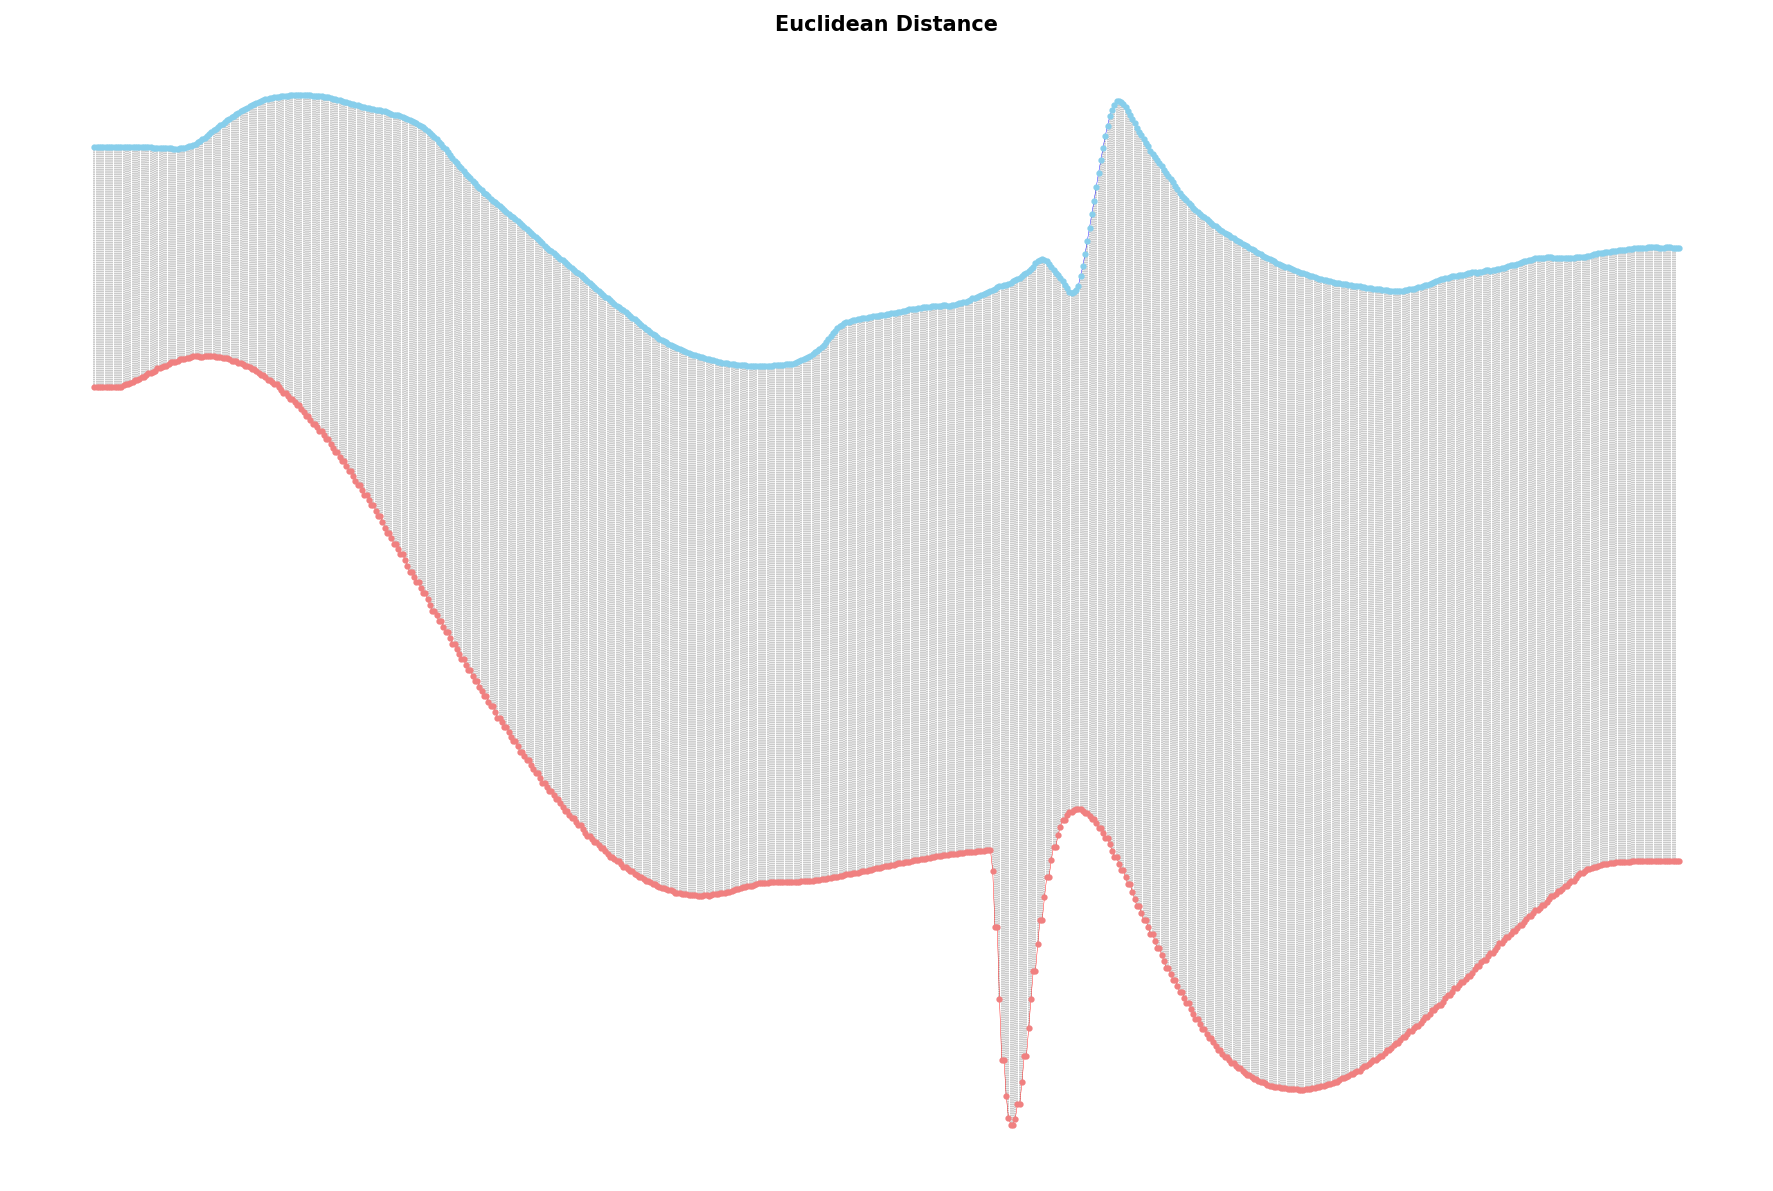

In [71]:
# Show log file data with the Euclidean distance between

fig, ax = plt.subplots(figsize=(15, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[1][i]) for i in np.arange(0, len(x[1]))]
yy = [(j, y[1][j]) for j in np.arange(0, len(y[1]))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=0.2)

ax.plot(x[1], '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y[1], '-bo', label='y', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance", fontsize=10, fontweight="bold")

In [72]:
# Conduct traditional DTW with fastdtw, copied from Chauhan's github: https://github.com/nageshsinghc4/-Dynamic-Time-Warping-DTW-
dtw_distance, warp_path = fastdtw(x[1], y[1], dist=euclidean) 

Text(0.5, 1.0, 'DTW Distance')

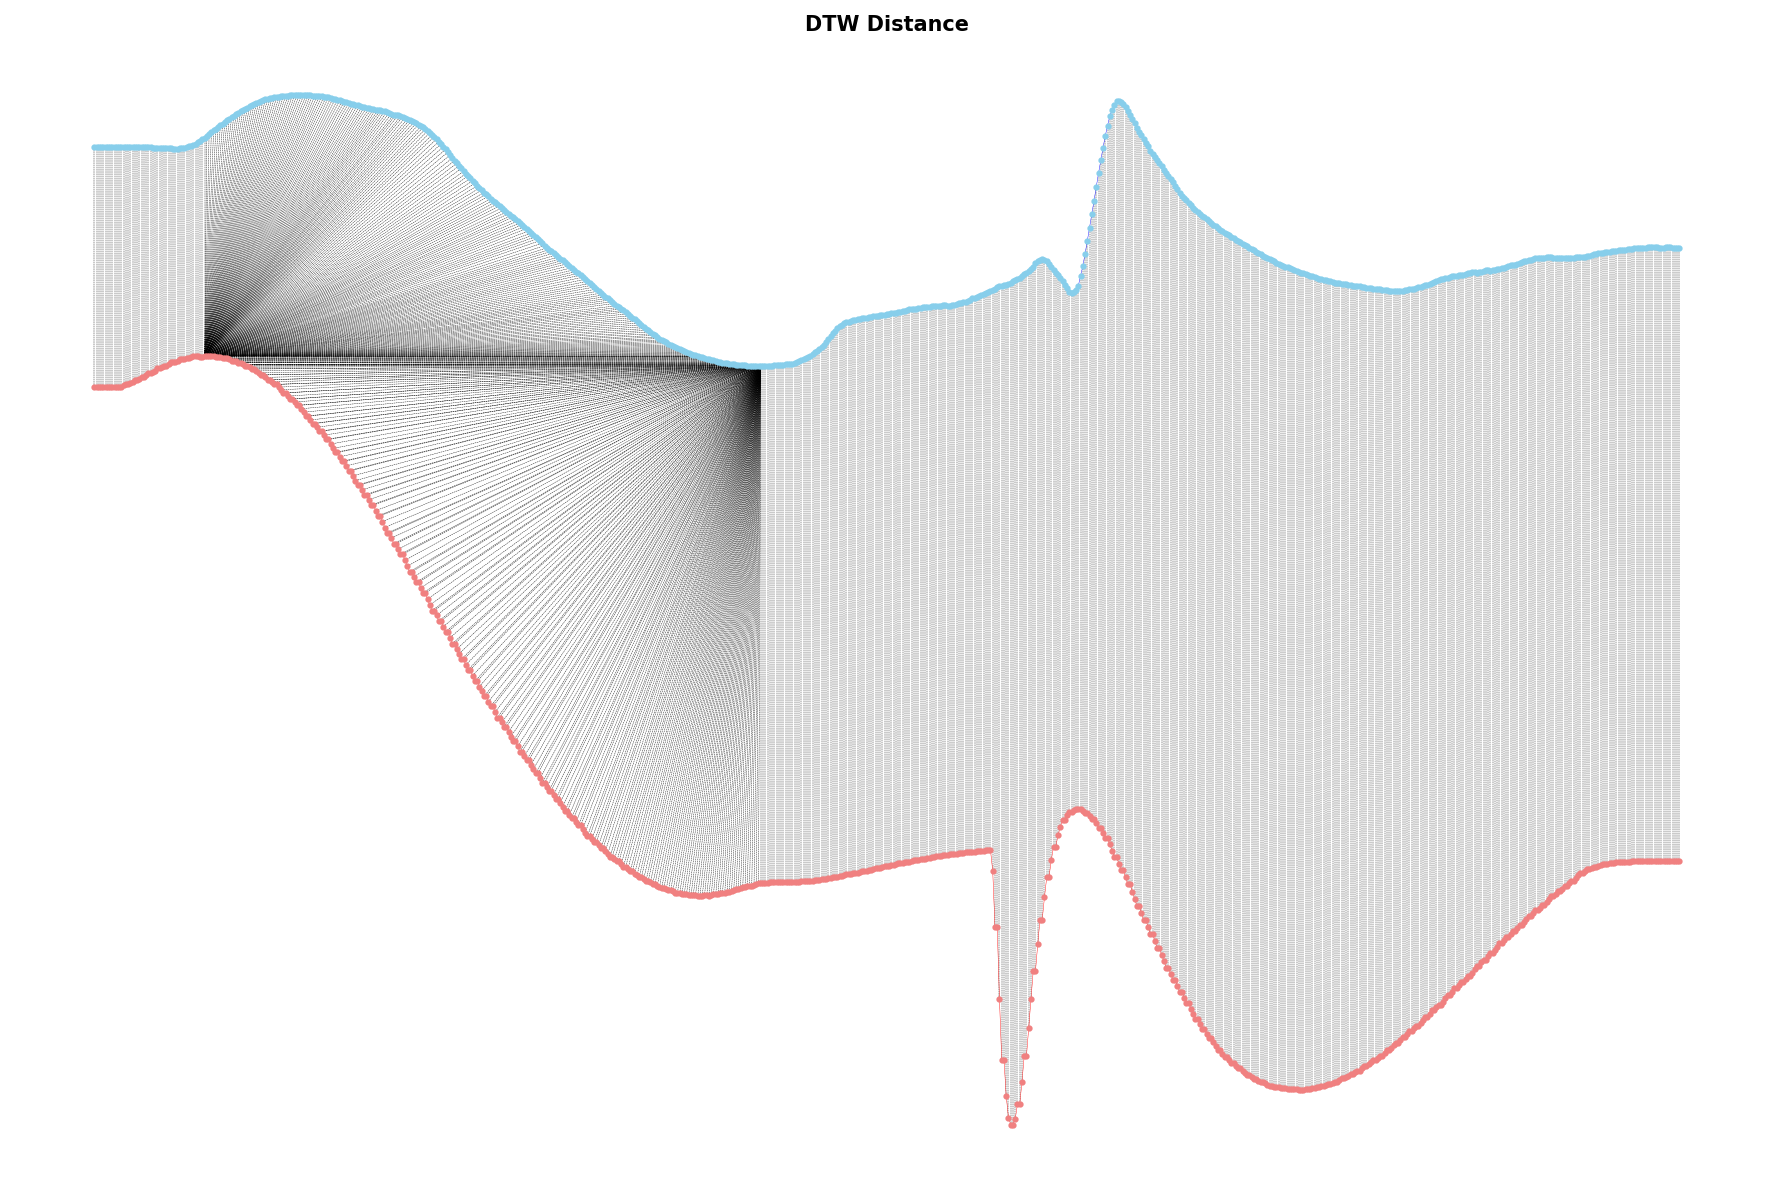

In [73]:
# Show traditional DTW result
fig, ax = plt.subplots(figsize=(15, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[1][map_x], y[1][map_y]], '--k', linewidth=0.2)

ax.plot(x[1], '-ro', label='x', linewidth=0.2, markersize=2, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y[1], '-bo', label='y', linewidth=0.2, markersize=2, markerfacecolor='skyblue', markeredgecolor='skyblue')

ax.set_title("DTW Distance", fontsize=10, fontweight="bold")

In [74]:
# Reshape X/Y data for GDTW operations
x = np.transpose(x)
x = torch.tensor(x)
y = np.transpose(y)
y = torch.tensor(y)

In [ ]:
# Find lowest cost path using Gromov-DTW, from the following github: https://github.com/samcohen16/Aligning-Time-Series

#iterations don't matter for GDTW, only for soft-GDTW. I think?
GDTW = gromov_dtw(max_iter=5,gamma=0.1,loss_only=0,dtw_approach='GDTW',verbose=1) 
loss, A = GDTW(x,y)

iter: 0 GDTW: 78854.546875
iter: 1 GDTW: 33982.65625


In [ ]:
A

In [63]:
loss

tensor(7990.3867)

In [64]:
A

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2161e-37, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 3.4873e-19,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])